In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd drive/MyDrive/NCKH

/content/drive/MyDrive/NCKH


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
!pip install easyocr # orc

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/NCKH/yolov5
     |████████████████████████████████| 596 kB 4.4 MB/s 
     |████████████████████████████████| 63.6 MB 73 kB/s 
     |████████████████████████████████| 47.8 MB 58 kB/s 


In [ ]:
!pip uninstall opencv-python-headless -y
!pip install opencv-python-headless==4.5.2.52 -y
import easyocr
reader = easyocr.Reader(['en'])

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

KeyboardInterrupt: ignored

In [ ]:
!python detect.py --weights /content/drive/MyDrive/NCKH/best_YoLov5.pt --img 416 --conf 0.1 --source /content/drive/MyDrive/NCKH/test/meter1203.jpg --save-txt

detect: weights=['/content/drive/MyDrive/NCKH/best_YoLov5.pt'], source=/content/drive/MyDrive/NCKH/test/meter1203.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/NCKH/test/meter1203.jpg: 416x256 1 box, Done. (0.115s)
Speed: 0.7ms pre-process, 115.1ms inference, 21.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


In [ ]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/drive/MyDrive/NCKH/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
path_img = ''
for path in glob.glob('/content/drive/MyDrive/NCKH/yolov5/runs/detect/exp/labels/*.txt'): #assuming JPG
    path_img = path
f = open(path_img,"r")
coordinates = f.readline().split(' ')
f.close()
print(coordinates)
for i,x in enumerate(coordinates):
  coordinates[i]= float(x)
x,y,w,h = coordinates[1:]
print(x,y,w,h)

['0', '0.500641', '0.430168', '0.126068', '0.0242788\n']
0.500641 0.430168 0.126068 0.0242788


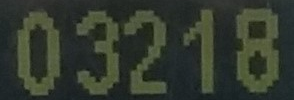

ans =  03218


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/NCKH/test/meter1203.jpg')
imgH,imgW = img.shape[:2]

xW = int(imgW*x)
yH = int(imgH*y)
W = int(w*imgW*0.5)
H = int(h*imgH*0.5)
cropImg = img[yH-H:yH+H,xW-W:xW+W]

cv2_imshow(cropImg)
res= reader.readtext(cropImg)
(position,ans,accuracy)= res[0]
print('ans = ',ans)